In [1]:
import os
import json
# change to results folder
os.environ['nnUNet_results'] = f'/home/nathan/segmentation_generator/'
os.environ['nnUNet_preprocessed'] = 'none'
os.environ['nnUNet_raw'] = 'none'

from nnunetv2.inference.predict_from_raw_data import predict_entry_point, predict_using_numpy

In [2]:
# load properties
with open('properties.json', 'r') as f:
    properties = json.load(f)

In [3]:
import SimpleITK as sitk
import numpy as np
input = sitk.GetArrayFromImage(sitk.ReadImage("/home/nathan/Desktop/nnUNet/dataset/nnUNet_raw/Dataset019_addedArt_cropped/imagesTr/neg_11_8_2_1_130_0000.nii.gz"))
true_mask = sitk.GetArrayFromImage(sitk.ReadImage("/home/nathan/Desktop/nnUNet/dataset/nnUNet_raw/Dataset019_addedArt_cropped/labelsTr/neg_11_8_2_1_130.nii.gz"))
image_1 = np.expand_dims(input, axis=0)
# testing with images of different sizes
image_2 = sitk.GetArrayFromImage(sitk.ReadImage("/home/nathan/Desktop/nnUNet/dataset/nnUNet_raw/Dataset019_addedArt_cropped/imagesTr/112_5_8_3_1_128_0000.nii.gz"))
image_2 = np.expand_dims(image_2, axis=0)
input = [image_1, image_2]

predictor = predict_using_numpy(input, '019', properties, c='2d', npp=2, nps=1, f = [0], chk ='checkpoint_best.pth')


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################



In [4]:
# grab masks
masks = predictor.grab_masks()

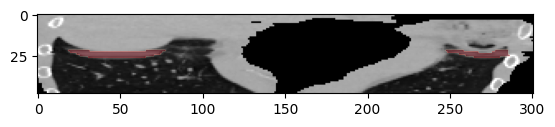

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image_1[0], cmap='gray', )
plt.imshow(masks[0][0], cmap='Reds', alpha=masks[0][0]*.5)
plt.imshow(true_mask, cmap='Greens', alpha=true_mask*.5)
plt.show()